In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def use_gpu():
    torch.set_default_tensor_type(torch.cuda.FloatTensor if torch.cuda.is_available() 
                                                         else torch.FloatTensor)
use_gpu()

In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print('Train Epoch: {}, Loss: {:.3f}'.format(epoch, loss.item()))


def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = len(test_loader.dataset)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Average loss: {:.3f}, Test Acc: {:.3f} ({}/{})'.format(test_loss, 100.*correct/total, correct, total))

In [ ]:
batch_size = 64
test_batch_size = 1000
criterion = nn.CrossEntropyLoss()

In [ ]:
trainset = datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testset = datasets.MNIST('../data', train=False, transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
train_loader = torch.utils.data.DataLoader(trainset,batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset,batch_size=test_batch_size, shuffle=False)

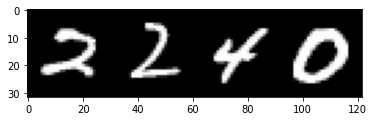

2 2 4 0


In [ ]:
def imshow(image):
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image,(1,2,0)))
    plt.show()

images,labels = next(iter(train_loader))
imshow(utils.make_grid(images[0:4]))
print(' '.join(str(labels[j].cpu().numpy()) for j in range(4)))

In [ ]:
epochs = 20
class Net_CNN(nn.Module):
    def __init__(self):
        super(Net_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1) # (n_channels, number_filter, filter_size, stride)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        if torch.cuda.is_available():
            x = x.to(device="cuda")
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        output = self.fc2(x)
        return output

model = Net_CNN()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

Train Epoch: 1, Loss: 0.154
Average loss: 0.000, Test Acc: 98.320 (9832/10000)
Train Epoch: 2, Loss: 0.020
Average loss: 0.000, Test Acc: 98.900 (9890/10000)
Train Epoch: 3, Loss: 0.034
Average loss: 0.000, Test Acc: 98.770 (9877/10000)
Train Epoch: 4, Loss: 0.034
Average loss: 0.000, Test Acc: 98.980 (9898/10000)
Train Epoch: 5, Loss: 0.003
Average loss: 0.000, Test Acc: 98.910 (9891/10000)
Train Epoch: 6, Loss: 0.011
Average loss: 0.000, Test Acc: 98.920 (9892/10000)
Train Epoch: 7, Loss: 0.016
Average loss: 0.000, Test Acc: 98.980 (9898/10000)
Train Epoch: 8, Loss: 0.000
Average loss: 0.000, Test Acc: 98.970 (9897/10000)
Train Epoch: 9, Loss: 0.001
Average loss: 0.000, Test Acc: 98.680 (9868/10000)
Train Epoch: 10, Loss: 0.000
Average loss: 0.000, Test Acc: 98.900 (9890/10000)
Train Epoch: 11, Loss: 0.000
Average loss: 0.000, Test Acc: 98.760 (9876/10000)
Train Epoch: 12, Loss: 0.000
Average loss: 0.000, Test Acc: 99.190 (9919/10000)
Train Epoch: 13, Loss: 0.001
Average loss: 0.000,

In [ ]:
epochs = 20
class Net_with_dropout(nn.Module):
    def __init__(self):
        super(Net_with_dropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        if torch.cuda.is_available():
            x = x.to(device="cuda")
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        x = self.dropout1(x)
        
        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        
        output = self.fc2(x)
        return output

model = Net_with_dropout()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

Train Epoch: 1, Loss: 0.139
Average loss: 0.000, Test Acc: 98.060 (9806/10000)
Train Epoch: 2, Loss: 0.122
Average loss: 0.000, Test Acc: 98.660 (9866/10000)
Train Epoch: 3, Loss: 0.051
Average loss: 0.000, Test Acc: 98.830 (9883/10000)
Train Epoch: 4, Loss: 0.038
Average loss: 0.000, Test Acc: 98.890 (9889/10000)
Train Epoch: 5, Loss: 0.156
Average loss: 0.000, Test Acc: 99.060 (9906/10000)
Train Epoch: 6, Loss: 0.023
Average loss: 0.000, Test Acc: 99.130 (9913/10000)
Train Epoch: 7, Loss: 0.010
Average loss: 0.000, Test Acc: 98.980 (9898/10000)
Train Epoch: 8, Loss: 0.019
Average loss: 0.000, Test Acc: 99.080 (9908/10000)
Train Epoch: 9, Loss: 0.163
Average loss: 0.000, Test Acc: 99.220 (9922/10000)
Train Epoch: 10, Loss: 0.003
Average loss: 0.000, Test Acc: 99.110 (9911/10000)
Train Epoch: 11, Loss: 0.153
Average loss: 0.000, Test Acc: 99.300 (9930/10000)
Train Epoch: 12, Loss: 0.000
Average loss: 0.000, Test Acc: 99.090 (9909/10000)
Train Epoch: 13, Loss: 0.007
Average loss: 0.000,